In [128]:
%load_ext autoreload
%autoreload 2

import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SpectralLayer import *
from entropyLayer import *

import tensorflow as tf
from pprint import pprint
from typing import List, Dict, Tuple,Any
from keras.layers import Layer,Dense
from tensorflow.python.keras import activations



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
imputs=tf.keras.layers.Input(shape=(3 * 3), dtype='float32')
layer =EntropyLayer(units=12, use_bias=False,flux_in=True,flux_out=False,activity=True ,activation=None)
layer(imputs)

<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'entropy_layer_261')>

In [130]:
## Data mnist

In [131]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

flat_train = np.reshape(x_train, [x_train.shape[0], 28 * 28])
flat_test = np.reshape(x_test, [x_test.shape[0], 28 * 28])

In [132]:
## View

In [133]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28 * 28), dtype='float32'))
model.add(EntropyLayer(units=1000, use_bias=False,flux_in=True,flux_out=False,activity=True , activation=None))
model.add(EntropyLayer(units=10, use_bias=False,flux_in=True,flux_out=False,activity=True ,activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entropy_layer_262 (Entropy  (None, 1000)              784       
 Layer)                                                          
                                                                 
 entropy_layer_263 (Entropy  (None, 10)                1000      
 Layer)                                                          
                                                                 
Total params: 1784 (6.97 KB)
Trainable params: 1784 (6.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
spectral_config={
    'is_base_trainable' : False,
    'is_diag_start_trainable' : True,
    'is_diag_end_trainable' : False,
    'use_bias' : False
}

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=(28 * 28), dtype='float32'))
model3.add(Spectral(1000,  **spectral_config,activation=None))
model3.add(Spectral(10,  **spectral_config,activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.003)
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_54 (ModuleW  (None, 1000)              784       
 rapper)                                                         
                                                                 
 module_wrapper_55 (ModuleW  (None, 10)                1000      
 rapper)                                                         
                                                                 
Total params: 1784 (6.97 KB)
Trainable params: 1784 (6.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Idea of flux dynamics

In [ ]:
## EntropyModel1

In [100]:
accuracy=list()
epochs=20
batch_size=200
N=[2,5,10,20,80,100,500,800,1000,1500,2000]

for i in range(len(N)):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(28 * 28), dtype='float32'))
    model.add(EntropyLayer(units=N[i], use_bias=False,flux_in=True,flux_out=False, activity=True ,activation=None))
    model.add(EntropyLayer(units=10, use_bias=False,flux_in=True,flux_out=False,activity=True ,activation='softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.003)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(flat_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model.evaluate(flat_test,y_test,batch_size=32,verbose="auto"))

313/313 [==============================] - 4s 11ms/step - loss: 0.2989 - accuracy: 0.9185


In [101]:
score=list()
for i in range(len(N)):
    score.append(accuracy[i][1])

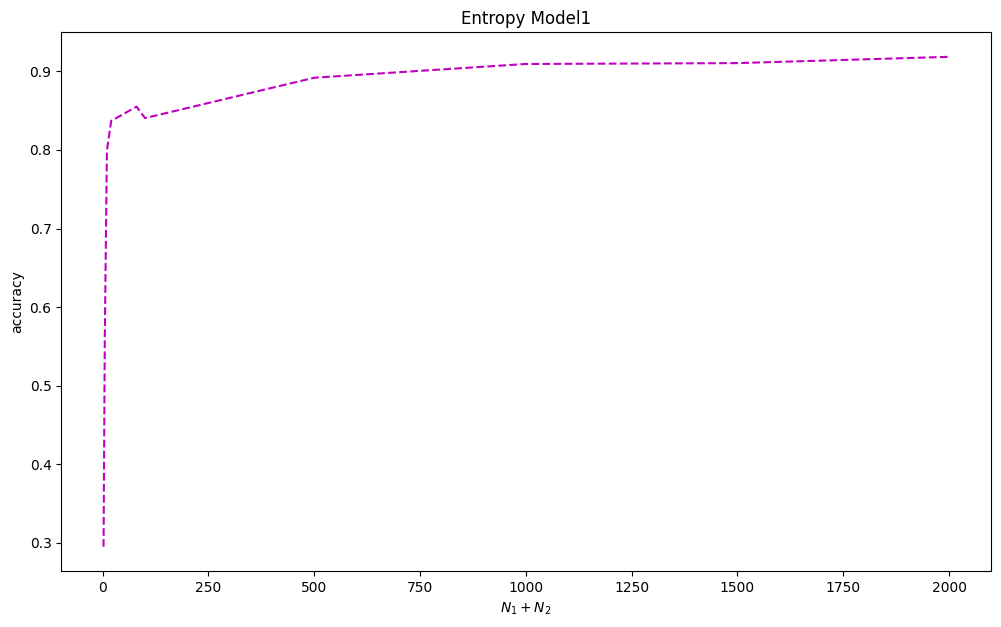

In [102]:
fig=plt.figure(num=1,figsize=(12,7)) 
plt.plot(N,score, "m--")
plt.xlabel("$N_{1}+N_{2}$")
plt.ylabel("accuracy")
plt.title("Entropy Model1")
plt.show()

## Model constraint :  Idea of transport theory

In [14]:
## EntropyModel2

In [110]:
accuracy1=list()
epochs=20
batch_size=200
N=[2,5,10,20,80,100,500,800,1000,1500,2000]

for i in range(len(N)):
    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.Input(shape=(28 * 28), dtype='float32'))
    model1.add(EntropyLayer(units=N[i], use_bias=False,flux_in=False,flux_out=True,  activity=True,activation=None))
    model1.add(EntropyLayer(units=10, use_bias=False,flux_in=False,flux_out=True, activity=True,activation='softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.003)
    model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(flat_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy1.append(model1.evaluate(flat_test,y_test,batch_size=32,verbose="auto"))

313/313 [==============================] - 4s 11ms/step - loss: 0.4277 - accuracy: 0.8761


In [111]:
score1=list()
for i in range(len(N)):
    score1.append(accuracy1[i][1])

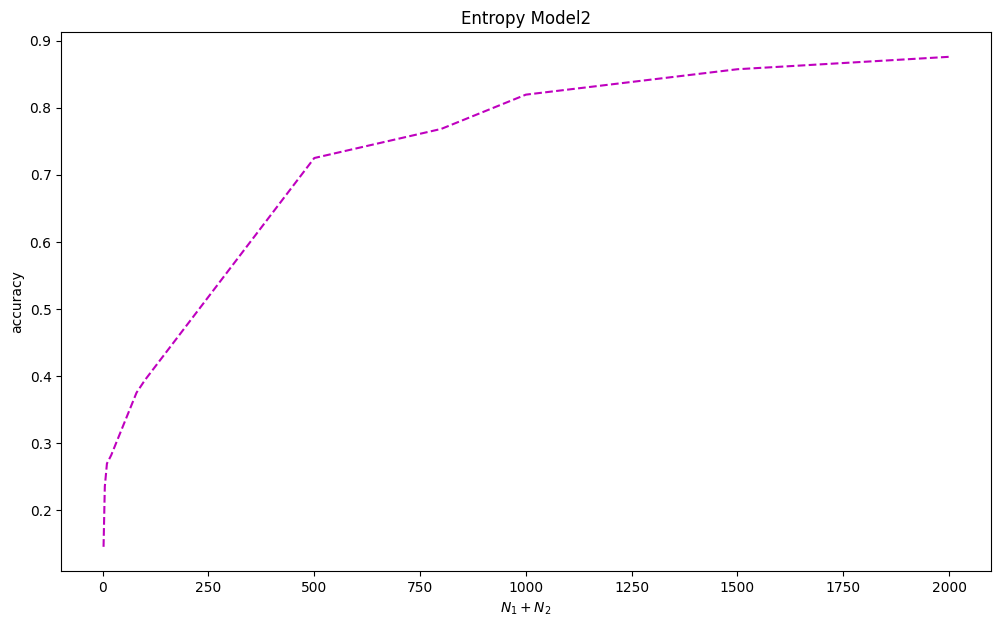

In [112]:
fig=plt.figure(num=1,figsize=(12,7)) 
plt.plot(N,score1, "m--")
plt.xlabel("$N_{1}+N_{2}$")
plt.ylabel("accuracy")
plt.title("Entropy Model2")
plt.show()

## Reference

In [92]:
accuracy2=list()
epochs=20
batch_size=200
N=[2,5,10,20,80,100,500,800,1000,1500,2000]

for i in range(len(N)):
    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.Input(shape=(28 * 28), dtype='float32'))
    model2.add(Dense(N[i],use_bias=False))
    model2.add(Dense(10, use_bias=False, activation='softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.003)
    model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model2.fit(flat_train, y_train, batch_size=200, epochs=epochs,verbose=0,validation_data=(flat_test, y_test))
    accuracy2.append(model2.evaluate(flat_test,y_test,batch_size=32,verbose="auto"))

313/313 [==============================] - 2s 4ms/step - loss: 0.3598 - accuracy: 0.9083


In [93]:
score2=list()
for i in range(len(N)):
    score2.append(accuracy2[i][1])

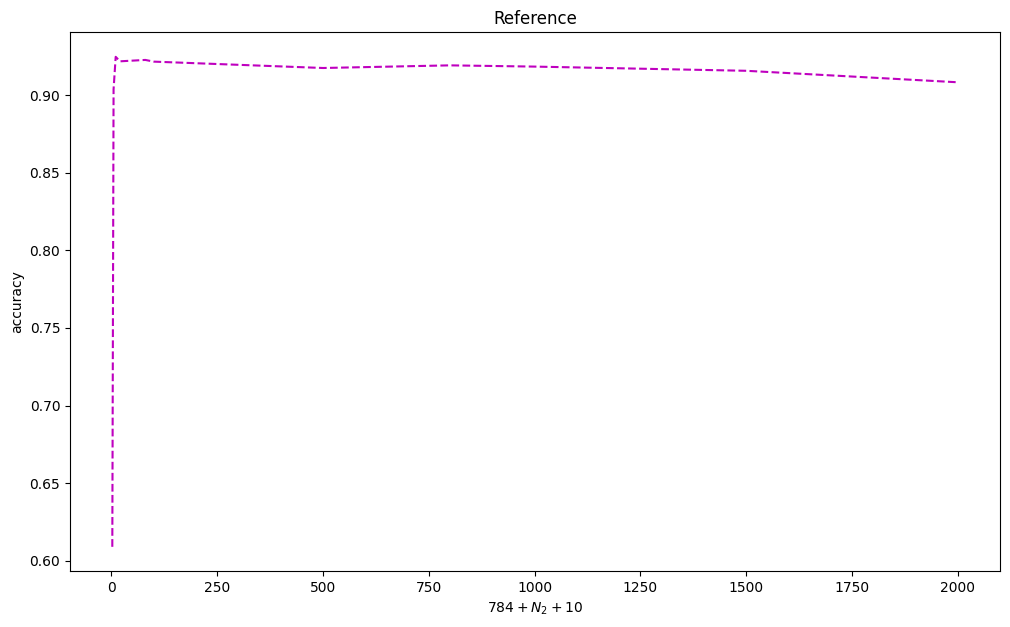

In [94]:
fig=plt.figure(num=1,figsize=(12,7)) 
plt.plot(N,score2, "m--")
plt.xlabel("$784+N_{2}+10$")
plt.ylabel("accuracy")
plt.title("Reference")
plt.show()

## Spectral

In [78]:
accuracy3=list()
epochs=20
batch_size=200
N=[2,5,10,20,80,100,500,800,1000,1500,2000]
spectral_config={
    'is_base_trainable' : False,
    'is_diag_start_trainable' : True,
    'is_diag_end_trainable' : False,
    'use_bias' : False
}

for i in range(len(N)):
    model3 = tf.keras.Sequential()
    model3.add(tf.keras.layers.Input(shape=(28 * 28), dtype='float32'))
    model3.add(Spectral(N[i],  **spectral_config,activation=None))
    model3.add(Spectral(10,  **spectral_config,activation='softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.003)
    model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model3.fit(flat_train, y_train, batch_size=200, epochs=epochs,verbose=0)
    accuracy3.append(model3.evaluate(flat_test,y_test,batch_size=32,verbose="auto"))

313/313 [==============================] - 2s 7ms/step - loss: 0.2909 - accuracy: 0.9180


In [79]:
score3=list()
for i in range(len(N)):
    score3.append(accuracy3[i][1])

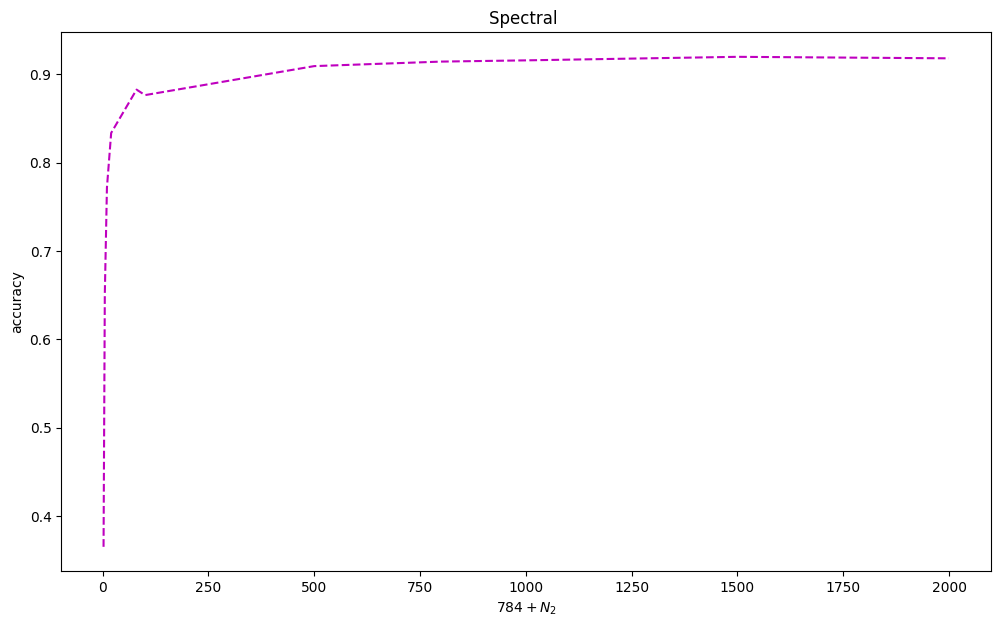

In [80]:
fig=plt.figure(num=1,figsize=(12,7)) 
plt.plot(N,score3, "m--")
plt.xlabel("$784+N_{2}$")
plt.ylabel("accuracy")
plt.title("Spectral ")
plt.show()

## compare

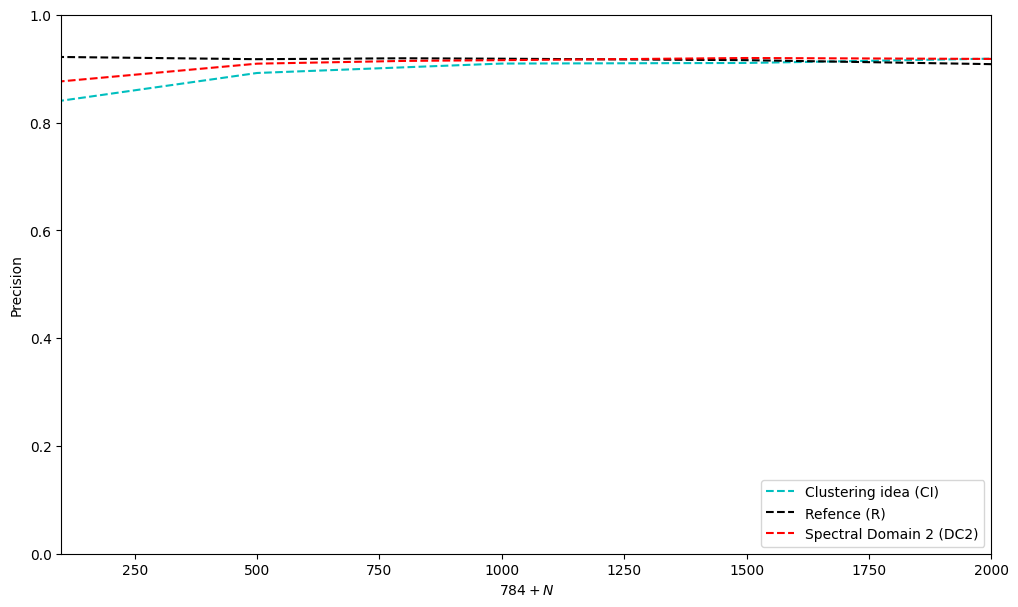

In [136]:
fig=plt.figure(num=1,figsize=(12,7)) 
N=[2,5,10,20,80,100,500,800,1000,1500,2000]
plt.plot(N,score, "c--")
#plt.plot(N,score1, "b")
plt.plot(N,score2, "k--")
plt.plot(N,score3, "r--")

plt.axis([100, 2000, 0, 1])

plt.xlabel("$784+N$")
plt.ylabel("Precision")


plt.legend(['Clustering idea (CI)',
           "Refence (R)",
           "Spectral Domain 2 (DC2)"],loc='lower right')

plt.show()